In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time

from __future__ import print_function
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
from keras.initializers import glorot_uniform
from keras.initializers import orthogonal
from keras.initializers import TruncatedNormal
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

C:\Users\yt690\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### CSVファイル読み込み

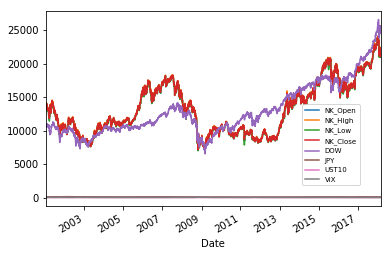

In [2]:
# 学習データの読み込み
df = pd.read_csv('mktdat.csv',encoding='utf-8',index_col='Date', parse_dates=[0])
df.plot()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=3, fontsize=7)
plt.show()

In [3]:
print(int(len(df.columns)))
print(int(len(df)))
df.head() 

8
4212


,NK_Open,NK_High,NK_Low,NK_Close,DOW,JPY,UST10,VIX
Date,,,,,,,,
2001-01-05,13763.22,13947.06,13725.46,13867.61,10912.41016,115.73,5.039,26.97
2001-01-09,13732.85,13732.85,13460.82,13610.51,10662.00977,116.59,4.929,28.67
2001-01-10,13593.16,13593.16,13349.15,13432.65,10572.54981,116.83,4.992,27.99
2001-01-11,13433.09,13436.61,13123.81,13201.07,10604.26953,116.49,5.098,26.80
2001-01-12,13246.20,13451.95,13246.20,13347.74,10609.54981,117.74,5.109,25.79


### データ加工

In [4]:
for i in range(0,int(len(df.columns))):
    for j in range(0,int(len(df))):
        if i == 0 : #列「NK_Open」の前日比のlogに100を乗じ、その値を新規列「NK_Open_ln」に
            print(100*np.log(df.iloc[j+1,i] / df.iloc[j,i]))
            df.iloc[j+1,8]=100*np.log(df.iloc[j+1,i] / df.iloc[j,i]) #<- ここがわかりません
        elif i == 1 :#新規列「NK_High_ln」
            print("NK_High_ln")
        elif i == 2 :#新規列「NK_Low_ln」
            print("NK_Low_ln")    
        elif i == 3 :#新規列「NK_Close_ln」
            print("NK_Close_ln")
        else:
            print("NA")

-0.22090438633701345


IndexError: single positional indexer is out-of-bounds